In [1]:
import os, importlib, sys, time

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import scipy.linalg as la
import scipy.stats as stats
import scipy.optimize as opt

In [4]:
import freqepid

# 1. parameters

In [5]:
T = 60
T0 = 40

In [6]:
GPi = np.load('data/GPi.npz')

## observation parameters

In [7]:
alpha = 0.01
r_Y = 10

$$Y_t = NegBinom( \frac{EY_t}{r_Y + EY_t}, r_Y )$$

$$ EY_t = \alpha\sum_{s=1}^{t-1} I_s \pi_{t-s} $$

## latent parameters

In [8]:
d = 2
beta = np.array([0.25, -2.45])

In [9]:
r_I = 100
K = 6.5

$$I_t = NegBinom( \frac{EI_t}{r_I + EI_t}, r_I )$$

$$ EI_t = R(\bar{A}_t, \beta) \sum_{s=1}^{t-1} I_s g_{t-s} $$

$$R(\bar{A}_t, \beta) = \frac{K}{1+\exp(- \beta^\top A_t)}$$

## seed values

In [10]:
mu = np.log(100)

$$I_{[-T_0,0)} = \exp(\mu_0)$$

# 2. simulation

In [11]:
num_sim = 1000

## load simulation

In [13]:
data = pd.read_feather('data/simulation_randinf_1.feather')

In [14]:
data

,sim,date,R,EI,infection,EY,death,intervention
0,0,0,3.654147,365.412210,399.0,0.956069,0,0
1,0,1,3.654147,385.435983,503.0,0.962544,0,0
2,0,2,3.654147,465.159133,437.0,0.968304,0,0
3,0,3,3.654147,597.396974,649.0,0.973840,1,0
4,0,4,3.654147,762.880480,808.0,0.980570,1,0
...,...,...,...,...,...,...,...,...
59995,999,55,0.648378,375.180437,339.0,16.169417,18,1
59996,999,56,0.648378,354.125362,386.0,15.366388,14,1
59997,999,57,0.648378,334.331543,341.0,14.592187,13,1
59998,999,58,0.648378,316.412701,325.0,13.841366,6,1


# 3. Fit

In [15]:
model = freqepid.Model(GPi['g'], GPi['pi'], alpha, K, T0, "nbinom")

In [16]:
nsim = np.zeros(num_sim)
msim = np.zeros(num_sim)
bsim = np.zeros((num_sim,d))

In [17]:
for iter_sim in np.arange(num_sim):
    start_sim = time.time()
    
    data_i = data[data['sim']==iter_sim]
    A = np.stack([np.full(T, 1), data_i["intervention"].to_numpy()], -1)
    Y = data_i["death"].to_numpy()
    
    # fit
    nmle, mmle, bmle, ll =\
    model.fit(A, Y, n_iter=500, step_size=1,
              history=False, verbose=False)
    
    nsim[iter_sim] = nmle
    msim[iter_sim] = mmle
    bsim[iter_sim,:] = bmle
    
    sys.__stdout__.write("%d-th simulation finished, %f sec.\n"
                         %(iter_sim+1, time.time()-start_sim))
    sys.__stdout__.flush()

/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/freqepid/model.py:140: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  bhaty = np.linalg.lstsq(Xy, Yy)[0]


1-th simulation finished, 3.006137 sec.
2-th simulation finished, 2.897541 sec.
3-th simulation finished, 3.007220 sec.
4-th simulation finished, 2.847811 sec.
5-th simulation finished, 3.220155 sec.
6-th simulation finished, 3.218339 sec.
7-th simulation finished, 2.718486 sec.
8-th simulation finished, 2.913473 sec.
9-th simulation finished, 2.687032 sec.
10-th simulation finished, 3.385433 sec.
11-th simulation finished, 3.065475 sec.
12-th simulation finished, 3.131058 sec.
13-th simulation finished, 3.008048 sec.
14-th simulation finished, 3.073901 sec.
15-th simulation finished, 2.726753 sec.
16-th simulation finished, 3.144393 sec.
17-th simulation finished, 2.782844 sec.
18-th simulation finished, 3.116831 sec.
19-th simulation finished, 3.324594 sec.
20-th simulation finished, 2.827610 sec.
21-th simulation finished, 2.772769 sec.
22-th simulation finished, 3.640340 sec.
23-th simulation finished, 3.224004 sec.
24-th simulation finished, 2.780574 sec.
25-th simulation finished

199-th simulation finished, 3.393639 sec.
200-th simulation finished, 2.934880 sec.
201-th simulation finished, 2.826718 sec.
202-th simulation finished, 2.874815 sec.
203-th simulation finished, 3.623270 sec.
204-th simulation finished, 3.283664 sec.
205-th simulation finished, 2.792899 sec.
206-th simulation finished, 3.198070 sec.
207-th simulation finished, 3.112351 sec.
208-th simulation finished, 3.310759 sec.
209-th simulation finished, 2.986630 sec.
210-th simulation finished, 2.919546 sec.
211-th simulation finished, 3.181961 sec.
212-th simulation finished, 3.428667 sec.
213-th simulation finished, 3.159681 sec.
214-th simulation finished, 3.301511 sec.
215-th simulation finished, 3.220861 sec.
216-th simulation finished, 3.468809 sec.
217-th simulation finished, 2.925148 sec.
218-th simulation finished, 2.814267 sec.
219-th simulation finished, 3.299604 sec.
220-th simulation finished, 3.321483 sec.
221-th simulation finished, 3.517291 sec.
222-th simulation finished, 3.0684

395-th simulation finished, 3.300162 sec.
396-th simulation finished, 3.319166 sec.
397-th simulation finished, 3.175043 sec.
398-th simulation finished, 3.341831 sec.
399-th simulation finished, 3.216887 sec.
400-th simulation finished, 3.265724 sec.
401-th simulation finished, 3.773672 sec.
402-th simulation finished, 3.039999 sec.
403-th simulation finished, 3.576839 sec.
404-th simulation finished, 2.959546 sec.
405-th simulation finished, 3.271189 sec.
406-th simulation finished, 2.748746 sec.
407-th simulation finished, 2.865853 sec.
408-th simulation finished, 2.885175 sec.
409-th simulation finished, 2.964261 sec.
410-th simulation finished, 2.807354 sec.
411-th simulation finished, 3.359197 sec.
412-th simulation finished, 2.772260 sec.
413-th simulation finished, 3.010668 sec.
414-th simulation finished, 2.970452 sec.
415-th simulation finished, 2.784958 sec.
416-th simulation finished, 2.742972 sec.
417-th simulation finished, 2.713153 sec.
418-th simulation finished, 3.3249

590-th simulation finished, 2.917789 sec.
591-th simulation finished, 3.006179 sec.
592-th simulation finished, 2.785633 sec.
593-th simulation finished, 3.042683 sec.
594-th simulation finished, 3.297351 sec.
595-th simulation finished, 2.691041 sec.
596-th simulation finished, 3.038133 sec.
597-th simulation finished, 3.194516 sec.
598-th simulation finished, 2.857633 sec.
599-th simulation finished, 3.373157 sec.
600-th simulation finished, 2.878813 sec.
601-th simulation finished, 2.940017 sec.
602-th simulation finished, 2.768091 sec.
603-th simulation finished, 3.114914 sec.
604-th simulation finished, 3.237720 sec.
605-th simulation finished, 3.637412 sec.
606-th simulation finished, 3.203266 sec.
607-th simulation finished, 2.919677 sec.
608-th simulation finished, 2.718283 sec.
609-th simulation finished, 2.781344 sec.
610-th simulation finished, 3.353826 sec.
611-th simulation finished, 3.072803 sec.
612-th simulation finished, 2.807057 sec.
613-th simulation finished, 2.8598

786-th simulation finished, 3.236652 sec.
787-th simulation finished, 2.873188 sec.
788-th simulation finished, 2.899023 sec.
789-th simulation finished, 3.100655 sec.
790-th simulation finished, 3.156952 sec.
791-th simulation finished, 3.547234 sec.
792-th simulation finished, 3.563356 sec.
793-th simulation finished, 3.245281 sec.
794-th simulation finished, 2.717902 sec.
795-th simulation finished, 2.871148 sec.
796-th simulation finished, 3.116978 sec.
797-th simulation finished, 3.445059 sec.
798-th simulation finished, 3.286787 sec.
799-th simulation finished, 2.905795 sec.
800-th simulation finished, 2.966254 sec.
801-th simulation finished, 3.184134 sec.
802-th simulation finished, 3.138240 sec.
803-th simulation finished, 3.273835 sec.
804-th simulation finished, 3.019390 sec.
805-th simulation finished, 2.758318 sec.
806-th simulation finished, 2.907282 sec.
807-th simulation finished, 3.023244 sec.
808-th simulation finished, 3.017649 sec.
809-th simulation finished, 3.2764

982-th simulation finished, 2.800854 sec.
983-th simulation finished, 2.694469 sec.
984-th simulation finished, 2.903201 sec.
985-th simulation finished, 3.129886 sec.
986-th simulation finished, 2.881156 sec.
987-th simulation finished, 2.841845 sec.
988-th simulation finished, 2.977233 sec.
989-th simulation finished, 3.339450 sec.
990-th simulation finished, 3.039227 sec.
991-th simulation finished, 3.188680 sec.
992-th simulation finished, 3.133088 sec.
993-th simulation finished, 2.949153 sec.
994-th simulation finished, 3.049842 sec.
995-th simulation finished, 3.183873 sec.
996-th simulation finished, 3.315039 sec.
997-th simulation finished, 3.399274 sec.
998-th simulation finished, 3.270893 sec.
999-th simulation finished, 2.978161 sec.
1000-th simulation finished, 2.884094 sec.


In [18]:
np.savez('coverage_freqepid_nbinom_randinf_1.npz',
         nsim = nsim, msim = msim, bsim = bsim)

# 4. Confidence Region Coverage Test

In [19]:
# locals.update(np.load('coverage_freqepid_nbinom_randinf_1.npz'))

In [20]:
Ihs_dth = np.zeros([num_sim, 2+d, 2+d])
Ts_dth = np.zeros(num_sim)
ps_dth = np.zeros(num_sim)

In [21]:
Ihs_hac = np.zeros([num_sim, 2+d, 2+d])
Ts_hac = np.zeros(num_sim)
ps_hac = np.zeros(num_sim)

In [22]:
Ihs_sdw = np.zeros([num_sim, 2+d, 2+d])
Ts_sdw = np.zeros(num_sim)
ps_sdw = np.zeros(num_sim)

In [23]:
for iter_sim in np.arange(num_sim):
    start_sim = time.time()
    
    nmle = nsim[iter_sim]
    mmle = msim[iter_sim]
    bmle = bsim[iter_sim,:]
    
    data_i = data[data['sim']==iter_sim]
    A = np.stack([np.full(T, 1), data_i["intervention"].to_numpy()], -1)
    Y = data_i["death"].to_numpy()
    
    Ihat_dth, Ihat_hac, Ihat_sdw =\
    model.inference(A, Y, nmle, mmle, bmle)
    
    # Fisher information matrix
    Ihs_dth[iter_sim] = Ihat_dth
    Ts_dth[iter_sim] = (bmle[1]-beta[1])/np.sqrt(la.pinv(Ihs_dth[iter_sim])[-1,-1])
    ps_dth[iter_sim] = 2*(1-stats.norm.cdf(np.abs(Ts_dth[iter_sim])))
    
    # HAC estimator
    Ihs_hac[iter_sim] = Ihat_hac
    Ts_hac[iter_sim] = (bmle[1]-beta[1])/np.sqrt(la.pinv(Ihs_hac[iter_sim])[-1,-1])
    ps_hac[iter_sim] = 2*(1-stats.norm.cdf(np.abs(Ts_hac[iter_sim])))
    
    # Sandwich estimator
    Ihs_sdw[iter_sim] = Ihat_sdw
    Ts_sdw[iter_sim] = (bmle[1]-beta[1])/np.sqrt(la.pinv(Ihs_sdw[iter_sim])[-1,-1])
    ps_sdw[iter_sim] = 2*(1-stats.norm.cdf(np.abs(Ts_sdw[iter_sim])))
    
    sys.__stdout__.write("%d-th simulation finished, %f sec.\n"
                         %(iter_sim+1, time.time()-start_sim))
    sys.__stdout__.flush()

1-th simulation finished, 0.003883 sec.
2-th simulation finished, 0.001591 sec.
3-th simulation finished, 0.001257 sec.
4-th simulation finished, 0.001298 sec.
5-th simulation finished, 0.001231 sec.
6-th simulation finished, 0.001237 sec.
7-th simulation finished, 0.001209 sec.
8-th simulation finished, 0.001233 sec.
9-th simulation finished, 0.001230 sec.
10-th simulation finished, 0.001379 sec.
11-th simulation finished, 0.001303 sec.
12-th simulation finished, 0.001236 sec.
13-th simulation finished, 0.001221 sec.
14-th simulation finished, 0.001222 sec.
15-th simulation finished, 0.001210 sec.
16-th simulation finished, 0.001201 sec.
17-th simulation finished, 0.001214 sec.
18-th simulation finished, 0.001192 sec.
19-th simulation finished, 0.001299 sec.
20-th simulation finished, 0.001212 sec.
21-th simulation finished, 0.001269 sec.
22-th simulation finished, 0.001225 sec.
23-th simulation finished, 0.001208 sec.
24-th simulation finished, 0.001287 sec.
25-th simulation finished

324-th simulation finished, 0.001695 sec.
325-th simulation finished, 0.001385 sec.
326-th simulation finished, 0.001336 sec.
327-th simulation finished, 0.001397 sec.
328-th simulation finished, 0.001318 sec.
329-th simulation finished, 0.001243 sec.
330-th simulation finished, 0.001274 sec.
331-th simulation finished, 0.001178 sec.
332-th simulation finished, 0.001202 sec.
333-th simulation finished, 0.001159 sec.
334-th simulation finished, 0.001185 sec.
335-th simulation finished, 0.001178 sec.
336-th simulation finished, 0.001239 sec.
337-th simulation finished, 0.001203 sec.
338-th simulation finished, 0.001227 sec.
339-th simulation finished, 0.001158 sec.
340-th simulation finished, 0.001196 sec.
341-th simulation finished, 0.001177 sec.
342-th simulation finished, 0.001208 sec.
343-th simulation finished, 0.001663 sec.
344-th simulation finished, 0.001498 sec.
345-th simulation finished, 0.001197 sec.
346-th simulation finished, 0.001250 sec.
347-th simulation finished, 0.0011

671-th simulation finished, 0.001439 sec.
672-th simulation finished, 0.001299 sec.
673-th simulation finished, 0.001227 sec.
674-th simulation finished, 0.001158 sec.
675-th simulation finished, 0.001146 sec.
676-th simulation finished, 0.001136 sec.
677-th simulation finished, 0.001184 sec.
678-th simulation finished, 0.001123 sec.
679-th simulation finished, 0.001140 sec.
680-th simulation finished, 0.001116 sec.
681-th simulation finished, 0.001140 sec.
682-th simulation finished, 0.001123 sec.
683-th simulation finished, 0.001149 sec.
684-th simulation finished, 0.001132 sec.
685-th simulation finished, 0.001144 sec.
686-th simulation finished, 0.001116 sec.
687-th simulation finished, 0.001164 sec.
688-th simulation finished, 0.001181 sec.
689-th simulation finished, 0.001155 sec.
690-th simulation finished, 0.001488 sec.
691-th simulation finished, 0.001462 sec.
692-th simulation finished, 0.001234 sec.
693-th simulation finished, 0.001143 sec.
694-th simulation finished, 0.0011

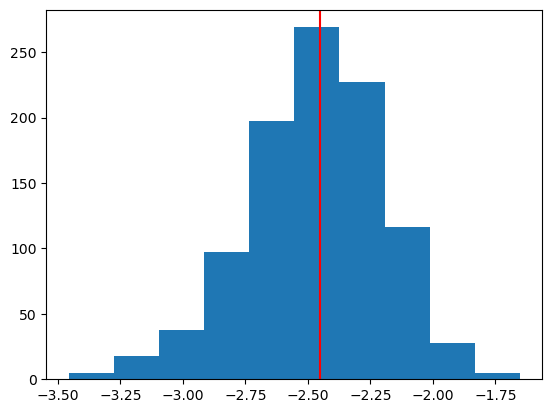

In [24]:
plt.hist(bsim[:,1])
plt.axvline(beta[1], color='red')

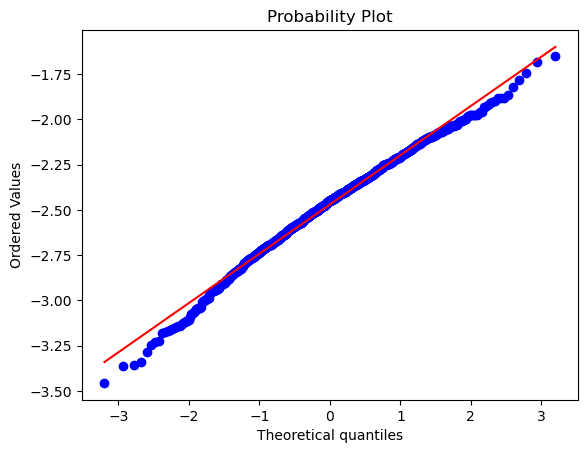

In [25]:
stats.probplot(bsim[:,1], dist = 'norm', plot=plt, fit=True)
# plt.plot([0, 1], [0, 1], color='black')
plt.show()

(array([ 24., 105., 223., 264., 216., 106.,  51.,   7.,   1.,   3.]),
 array([-2.47287646, -1.78155851, -1.09024056, -0.39892261,  0.29239534,
         0.98371329,  1.67503124,  2.36634919,  3.05766715,  3.7489851 ,
         4.44030305]),
 <BarContainer object of 10 artists>)

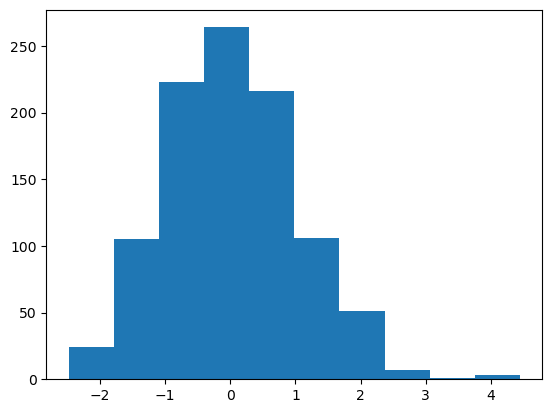

In [26]:
plt.hist(Ts_dth)

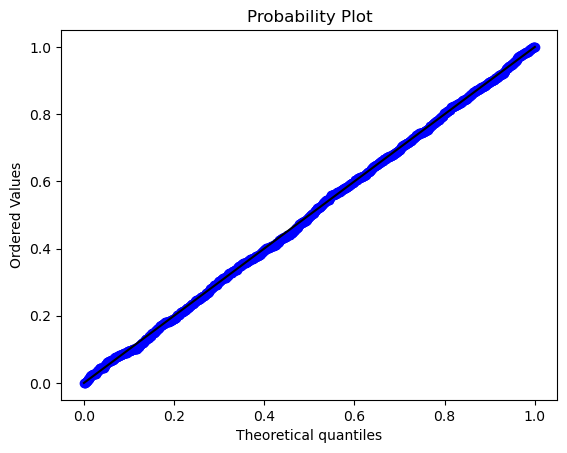

In [27]:
stats.probplot(ps_dth, dist = 'uniform', plot=plt, fit=False)
plt.plot([0, 1], [0, 1], color='black')
plt.show()

In [28]:
np.mean(np.abs(ps_dth) > 0.05)

0.955

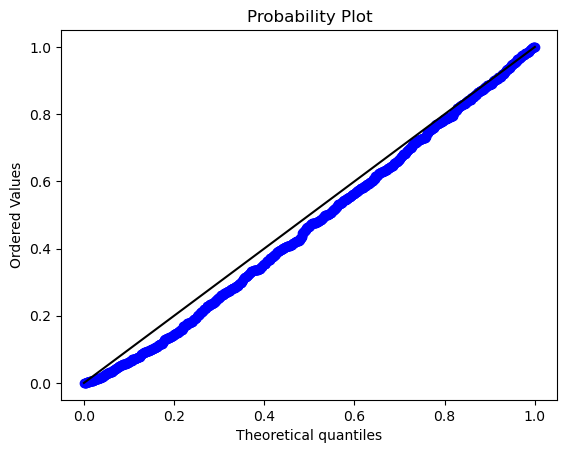

In [29]:
stats.probplot(ps_sdw, dist = 'uniform', plot=plt, fit=False)
plt.plot([0, 1], [0, 1], color='black')
plt.show()

In [30]:
np.mean(np.abs(ps_sdw) > 0.05)

0.921